### Описание проекта. ###

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства __«Вольный луг»__. Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ __«ЭкоФерма»__.  


Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!  


Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:  
1) Первая будет прогнозировать возможный удой коровы (целевой признак __Удой__);  
2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак __Вкус молока__).  
С помощью модели нужно отобрать коров по двум критериям:  
средний удой за год — не менее 6000 килограммов;  
молоко должно быть вкусным. 

Файл __ferma_main.csv__ содержит данные о стаде фермера на текущий момент. Описание данных:  
__id__ — уникальный идентификатор коровы.  
__Удой, кг__ — масса молока, которую корова даёт в год (в килограммах).  
__ЭКЕ (Энергетическая кормовая единица)__ — показатель питательности корма коровы.  
__Сырой протеин, г__ — содержание сырого протеина в корме (в граммах).  
__СПО (Сахаро-протеиновое соотношение)__ — отношение сахара к протеину в корме коровы.  
__Порода__ — порода коровы.  
__Тип пастбища__ — ландшафт лугов, на которых паслась корова.  
__порода папы_быка__ — порода папы коровы.  
__Жирность,%__ — содержание жиров в молоке (в процентах).  
__Белок,%__ — содержание белков в молоке (в процентах).  
__Вкус молока__ — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).  
__Возраст__ — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  


Признаки в датасете __ferma_main.csv__ можно разделить на группы.  
Характеристики коровы: __id, Порода, порода папы_быка, Возраст__.  
Характеристики корма: __ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение)__.  
Характеристика пастбища: __Тип пастбища__.  
Характеристики молока: __Удой, кг, Жирность,%, Белок,%, Вкус молока__.  
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете. 


Файл __ferma_dad.csv__ хранит имя папы каждой коровы в стаде фермера. Описание данных:  
__id__ — уникальный идентификатор коровы.  
__Имя Папы__ — имя папы коровы.  


Файл __cow_buy.csv__ — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:  
__Порода__ — порода коровы.  
__Тип пастбища__ — ландшафт лугов, на которых паслась корова.  
__порода папы_быка__ — порода папы коровы.  
__Имя_папы__ — имя папы коровы.  
__Текущая_жирность,%__ — содержание жиров в молоке (в процентах).  
__Текущий_уровень_белок,%__ — содержание белков в молоке (в процентах).  
__Возраст__ — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-learn==1.1.3 -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy import stats as st
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import statsmodels.api as sm                                              
from statsmodels.stats.outliers_influence import variance_inflation_factor

RANDOM_STATE = 42

## 1) Загрузка данных

In [4]:
df1 = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal = ',')
df2 = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal = ',')
df3 = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv',sep=';', decimal = ',')

df_ferma_mine=df1.copy()
df_ferma_dad=df2.copy()
df_cow_buy=df3.copy()

In [5]:
def Load_info(df):
    display(df.describe())
    print('************************************************')
    display(df.head())
    print('************************************************')
    display(df.info())
    print('************************************************')
    print('Кол-во дубликатов : ',df.duplicated().sum())
    print('************************************************')


In [6]:
basa=[df_ferma_mine, df_ferma_dad, df_cow_buy]

for df in basa:
    Load_info(df)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


************************************************


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока              

None

************************************************
Кол-во дубликатов :  5
************************************************


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


************************************************


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

************************************************
Кол-во дубликатов :  0
************************************************


,"Текущая_жирность,%","Текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


************************************************


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

************************************************
Кол-во дубликатов :  4
************************************************


In [7]:
def dubl(basa):#проверка на неявные дубли
    display(basa['Порода'].sort_values(ascending=False).unique()) 
    display(basa['Тип пастбища'].sort_values(ascending=False).unique())
    display(basa['порода папы_быка'].sort_values(ascending=False).unique())

In [8]:
dubl(df_ferma_mine) # Прверка на неявные дубли данных о стаде фермера на текущий момент.

array(['РефлешнСоверинг', 'Вис Бик Айдиал'], dtype=object)

array(['Холмистое', 'Равнинные', 'Равнинное'], dtype=object)

array(['Соверин', 'Айдиалл', 'Айдиал'], dtype=object)

In [9]:
dubl(df_cow_buy) # Прверка на неявные дубли данных о коровах «ЭкоФермы».

array(['РефлешнСоверинг', 'Вис Бик Айдиал'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

array(['Соверин', 'Айдиал'], dtype=object)

In [10]:
df_ferma_dad['Имя Папы'].sort_values(ascending=False).unique() # Прверка на неявные дубли имен пап.

array(['Соловчик', 'Геркулес', 'Буйный', 'Барин'], dtype=object)

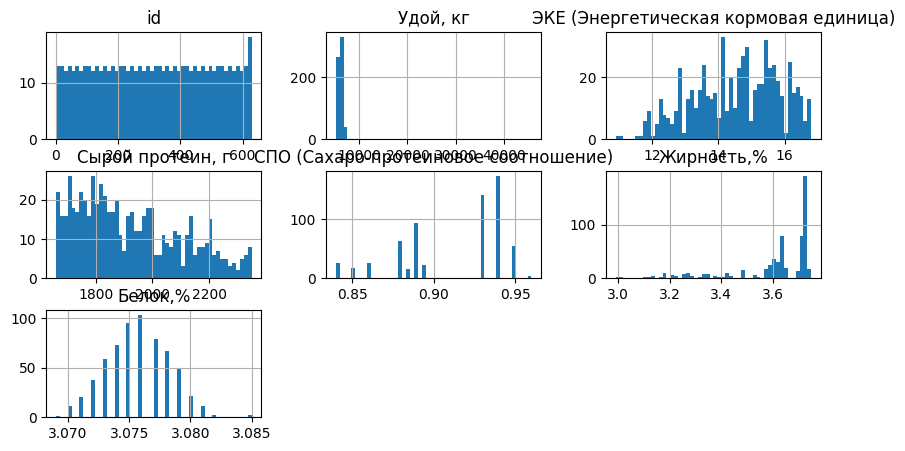

In [11]:
df_ferma_mine.hist(figsize=(10,5), bins=50)

pass

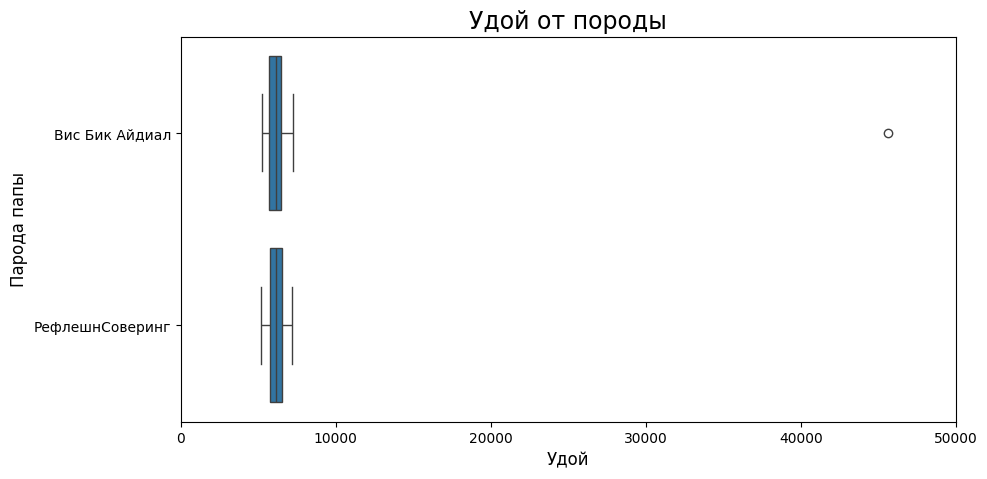

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_ferma_mine, y='Порода', x='Удой, кг')
plt.xlim(0, 50000)

plt.title('Удой от породы', size=17)
plt.xlabel('Удой', size=12)
plt.ylabel('Парода папы', size=12)

plt.show()

In [13]:
display(pd.DataFrame(round(df_ferma_mine.isna().mean()*100,)).style.background_gradient('coolwarm'))
pd.DataFrame(round(df_cow_buy.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
id,0.000000
"Удой, кг",0.000000
ЭКЕ (Энергетическая кормовая единица),0.000000
"Сырой протеин, г",0.000000
СПО (Сахаро-протеиновое соотношение),0.000000
Порода,0.000000
Тип пастбища,0.000000
порода папы_быка,0.000000
"Жирность,%",0.000000
"Белок,%",0.000000


,0
Порода,0.000000
Тип пастбища,0.000000
порода папы_быка,0.000000
Имя_папы,0.000000
"Текущая_жирность,%",0.000000
"Текущий_уровень_белок,%",0.000000
Возраст,0.000000


In [14]:

df_ferma_mine = df_ferma_mine[df_ferma_mine['Удой, кг']!=45616]#.reset_index(drop=True)


Первичный анализ показала:
Данные довольно чистые но небрежные.  
1) В DF __df_ferma_mine и df_cow_buy__ присутсвеют дубли как явные так и не явные.  
  a) Hеявные дули выявленны в следующих столбцах __Тип пастбища__ и __порода папы_быка__, так де выявленно не соответсвие записи данных.
2) Необходимо привести к общему виду наименование столбцов.
3) Пропуски отсутсвуют.
4) Есть небольшие выбросы например удой > 4000 кг.
5) Есть выбросы, надо далее исследовать.
6) Поменять тип столбцов с числовыми значениями.

##  Предобработка данных

___Приведем к общему виду колонки.___


In [15]:
df_ferma_mine= df_ferma_mine.rename(columns={'Удой, кг':'Удой,кг','Сырой протеин, г': 'Сырой_протеин,кг', 'Тип пастбища' : 'Тип_пастбища', 'порода папы_быка' : 'Порода_папы_быка', 'Вкус молока':'Вкус_молока','ЭКЕ (Энергетическая кормовая единица)':'ЭКЕ(Энерг_корм_ед)','СПО (Сахаро-протеиновое соотношение)':'СПО(Сах_прот_соот)' } )
df_cow_buy= df_cow_buy.rename(columns={'Тип пастбища' : 'Тип_пастбища', 'порода папы_быка' : 'Порода_папы_быка', 'Текущий_уровень_белок,%' : 'Белок,%', 'Текущая_жирность,%': 'Жирность,%'})
df_ferma_dad = df_ferma_dad.rename(columns={'Имя Папы' : 'Имя_папы'} )

___Удаляем явные дубли дубли___

In [16]:
df_ferma_mine = df_ferma_mine.drop_duplicates().reset_index(drop=True)
df_cow_buy = df_cow_buy.drop_duplicates().reset_index(drop=True)
print('Кол-во дубликатов в df_ferma_mine: ',df_ferma_mine.duplicated().sum())
print('Кол-во дубликатов в df_ferma_dad:  ',df_ferma_dad.duplicated().sum())
print('Кол-во дубликатов в df_cow_buy:    ',df_cow_buy.duplicated().sum())

Кол-во дубликатов в df_ferma_mine:  0
Кол-во дубликатов в df_ferma_dad:   0
Кол-во дубликатов в df_cow_buy:     0


___Удоляем не явные дубли___

In [17]:
def dubl(basa):#проверка на неявные дубли
    display(basa['Порода'].sort_values(ascending=False).unique()) 
    display(basa['Тип_пастбища'].sort_values(ascending=False).unique())
    display(basa['Порода_папы_быка'].sort_values(ascending=False).unique())

In [18]:
dubl(df_ferma_mine)

array(['РефлешнСоверинг', 'Вис Бик Айдиал'], dtype=object)

array(['Холмистое', 'Равнинные', 'Равнинное'], dtype=object)

array(['Соверин', 'Айдиалл', 'Айдиал'], dtype=object)

In [19]:
dubl(df_cow_buy)

array(['РефлешнСоверинг', 'Вис Бик Айдиал'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

array(['Соверин', 'Айдиал'], dtype=object)

In [20]:
df_ferma_mine['Порода'] = df_ferma_mine['Порода'].replace('РефлешнСоверинг','Рефлешн_Соверинг')
df_ferma_mine['Порода'] = df_ferma_mine['Порода'].replace('Вис Бик Айдиал','Вис_Бик_Айдиал')
df_ferma_mine['Тип_пастбища'] = df_ferma_mine['Тип_пастбища'].replace('Равнинные','Равнинное')
df_ferma_mine['Порода_папы_быка'] = df_ferma_mine['Порода_папы_быка'].replace('Айдиалл','Айдиал')
df_cow_buy['Порода'] = df_cow_buy['Порода'].replace('РефлешнСоверинг','Рефлешн_Соверинг')
df_cow_buy['Порода'] = df_cow_buy['Порода'].replace('Вис Бик Айдиал','Вис_Бик_Айдиал')
df_cow_buy['Тип_пастбища'] = df_cow_buy['Тип_пастбища'].replace('равнинное','Равнинное')
df_cow_buy['Тип_пастбища'] = df_cow_buy['Тип_пастбища'].replace('холмистое','Холмистое')

___Меняем тип данных___

In [21]:
def re_type(base_re_type):
    columns1 = ['Белок,%', 'ЭКЕ(Энергетическая_кормовая_единица)', 'СПО(Сахаро_протеиновое_соотношение)', 'Жирность,%']
    columns2 = ['Текущая_жирность,%', 'Текущий_уровень_белок,%']
    columns3 = ['Вкус_молока_code', 'Тип_пастбища_code', 'Порода_папы_быка_code', 'Порода_code', 'Возраст_code']
    
    if base_re_type == 1:
        base_re_type = df_ferma_mine
        column = columns1
        column3 = columns3
        for column in column:
            base_re_type[column] = (base_re_type[column].str.replace(',', '.'))
            base_re_type[column] = base_re_type[base_re_type[column].notnull()][column].astype('float')
        #for column_code in column3:
           # base_re_type[column_code] = base_re_type[base_re_type[column_code].notnull()][column_code].astype('int')
            
    elif base_re_type == 2:
        base_re_type = df_cow_buy
        column = columns2
        for column in column:            
            base_re_type[column] = (base_re_type[column].str.replace(',', '.'))
            base_re_type[column] = base_re_type[base_re_type[column].notnull()][column].astype('float')
    else:
        pass
            

In [22]:
display(df_ferma_mine.info())
print('**********************************************************************************')
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  628 non-null    int64  
 1   Удой,кг             628 non-null    int64  
 2   ЭКЕ(Энерг_корм_ед)  628 non-null    float64
 3   Сырой_протеин,кг    628 non-null    int64  
 4   СПО(Сах_прот_соот)  628 non-null    float64
 5   Порода              628 non-null    object 
 6   Тип_пастбища        628 non-null    object 
 7   Порода_папы_быка    628 non-null    object 
 8   Жирность,%          628 non-null    float64
 9   Белок,%             628 non-null    float64
 10  Вкус_молока         628 non-null    object 
 11  Возраст             628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.0+ KB


None

**********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            16 non-null     object 
 1   Тип_пастбища      16 non-null     object 
 2   Порода_папы_быка  16 non-null     object 
 3   Имя_папы          16 non-null     object 
 4   Жирность,%        16 non-null     float64
 5   Белок,%           16 non-null     float64
 6   Возраст           16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


___Переводим 'Сырой протеин' в килограммы___

In [23]:
df_ferma_mine['Сырой_протеин,кг'] = df_ferma_mine[df_ferma_mine['Сырой_протеин,кг'].notnull()]['Сырой_протеин,кг'].astype('float')
df_ferma_mine['Сырой_протеин,кг'] = df_ferma_mine['Сырой_протеин,кг']/1000

In [24]:
df_ferma_mine.head()

,id,"Удой,кг",ЭКЕ(Энерг_корм_ед),"Сырой_протеин,кг",СПО(Сах_прот_соот),Порода,Тип_пастбища,Порода_папы_быка,"Жирность,%","Белок,%",Вкус_молока,Возраст
0,1,5863,14.2,1.743,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2.138,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1.854,0.885,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2.012,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1.675,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


## Исследовательский анализ данных

__3.1 Построение Boxplot для определения выбросов__

In [25]:
df_ferma_mine_test = df_ferma_mine.drop(['Порода','Тип_пастбища', 'Порода_папы_быка', 'Возраст', 'Вкус_молока'], axis=1)
def hotmap():
    
    _, axes = plt.subplots(1, 6,figsize=(20,6))
    col = (['Удой,кг', 'ЭКЕ(Энерг_корм_ед)','Сырой_протеин,кг', 'СПО(Сах_прот_соот)', 'Жирность,%','Белок,%'])
    count=0
    for i in col:
        ax = sns.boxplot(df_ferma_mine_test[i], ax = axes[count]);
        ax.set_title(i, fontsize=12)
        count +=1 

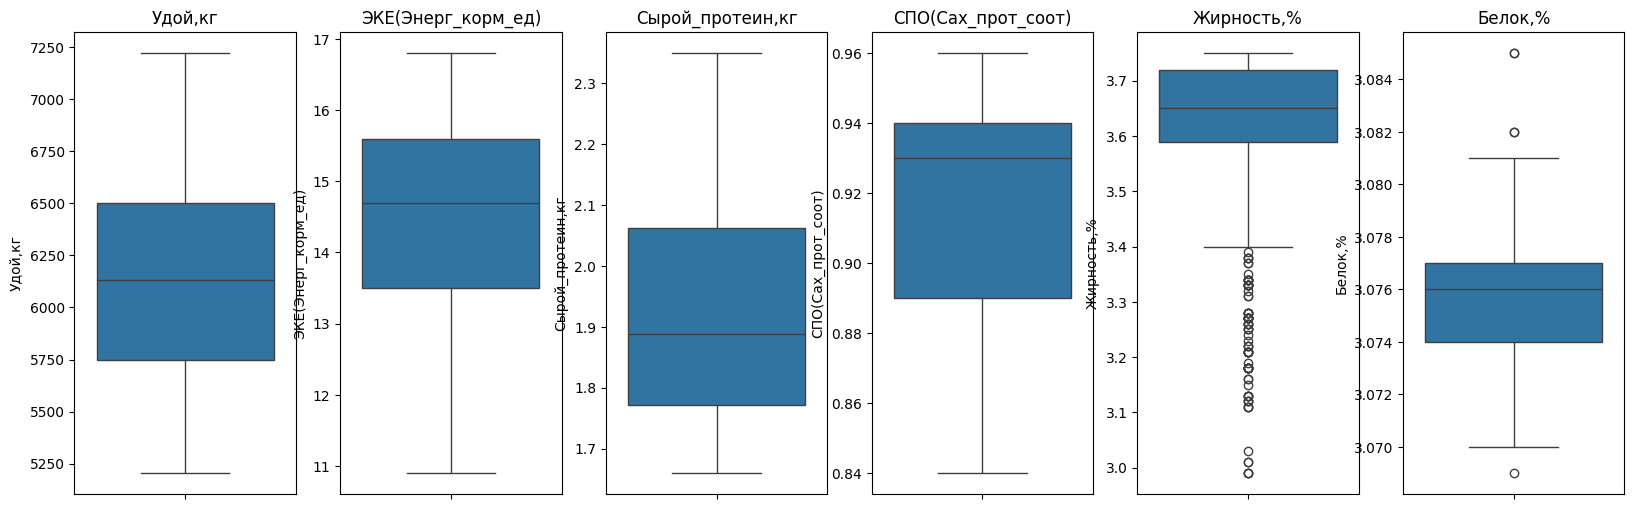

In [26]:
hotmap()

__Выводы по boxplot:__   
Выбросы наблюдаются в значениях жирность и белок но ими можно предебречь так как значение колонок коллеблются в 0,1 до 0,01%. В остольном с данными проблем нет. Невероятное значение колонки удой равное 45616 кг удалил так как считаю что не существует ещё на земле коровы которая могла бы дать такое кол-во молока за год.

__3.2 Проведение графического анализа__

Выделим основной критерий, это качество молока, столбец Вкус молока параметр вкусно.

In [27]:
df_ferma_mine_god = df_ferma_mine[df_ferma_mine['Вкус_молока'] == 'вкусно'].reset_index(drop=True) # исследуем только "вкусное" молоко

def bar_god_milk():
    columns = ['Порода','Тип_пастбища', 'Порода_папы_быка', 'Возраст']
    titles =['График зависимости удой-порода','График зависимости удой-тип пастбища','График зависимости удой порода-папы быка','График зависимости удой-возраст']
    ncol = 2
    rows = len(columns)-ncol
    _, axs = plt.subplots(rows, ncol, figsize=(15,10))
    сount_2=0
    count=0
    for i in range(len(columns)):
        if i<len(columns)-1:
            df_ferma_mine_god.groupby(columns[i])['Удой,кг'].mean().plot(kind ='bar',title = titles[i],edgecolor='black', rot=0, ax = axs[count,сount_2], ylabel='кол-во',xlabel=columns[i], grid=True, ylim=(5800,6400));
            if сount_2==1:
                сount_2 -=1
                count+=1
            else:
                сount_2+=1
        else:
            df_ferma_mine_god.groupby(columns[i])['Удой,кг'].mean().plot(kind ='bar',title = titles[i],edgecolor='black', rot=0, ax = axs[count, сount_2], ylabel='кол-во',xlabel=columns[i], grid=True, ylim=(5000,6500));
          
   



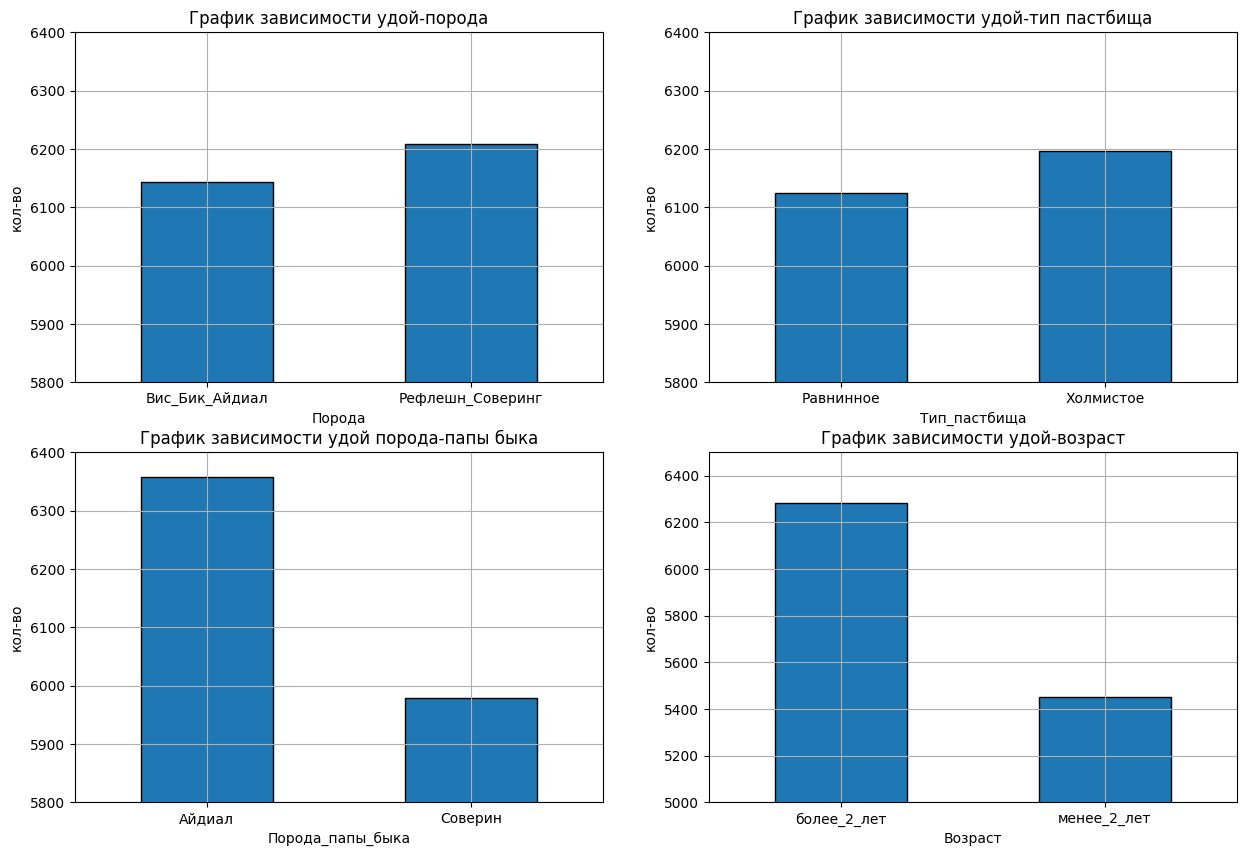

In [28]:
bar_god_milk()

__Можно подвести некоторые предворителные выводы:__
1) График зависимости удой-порода показал Рефлешн Соверинг более удоистые :-)
2) График зависимости удой-тип пастбища покаг бурёнки посущиеся на холмистом посбище более результативны.
3) График зависимости удой-порода папы быка уверено показывает буренки с кровным родством с быками породы Айдиал, показали давольно хорошие удои. А буренки с отцами породы Соверин не соответсвуют наложеным требованием в 6000кг в год.

4) График зависимости удой-возраст, тут все вполне обьяснимо так как период лактрации у коров только к двум годам начинается, поэтому эти данные не совсем корректы надо поменять на более 4 и менее 4 так как период локтации у коров до 5 лет в среднем.  

__Итог:__   
Идеальная буренка должна быть породдой Рефлешн Соверинг, постись на холмистых пазбещах, обязательно что бы бык отец был породы Айдиал и возраст должен быть не менее 1,5 лет и не более 3. ТОгда это будит идеальная буренка дающаяя рекодные удои. 

__Проверка на нормальность распределения количественных данных.__

In [29]:
def bar_god_milk_col(data):
    columns = ['Удой,кг', 'ЭКЕ(Энерг_корм_ед)', 'Сырой_протеин,кг', 'СПО(Сах_прот_соот)', 'Жирность,%', 'Белок,%']
            
    count=0
    for i in range(len(columns)):
        rel = sns.displot(data=data, x=columns[i], kde=True, bins=30,).set(title='График распределения '+ columns[i])
        count+=1  

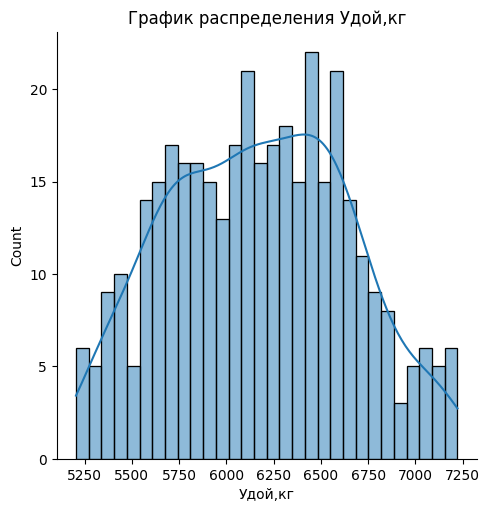

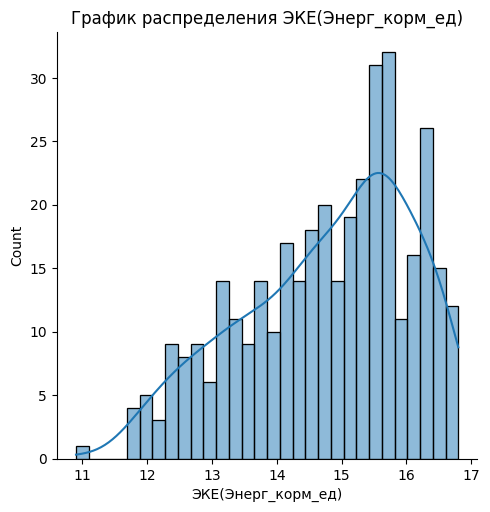

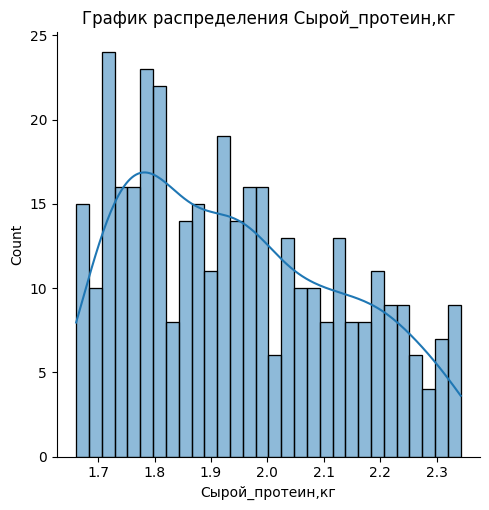

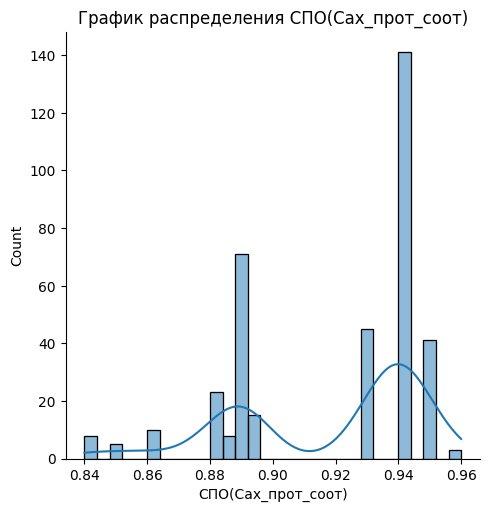

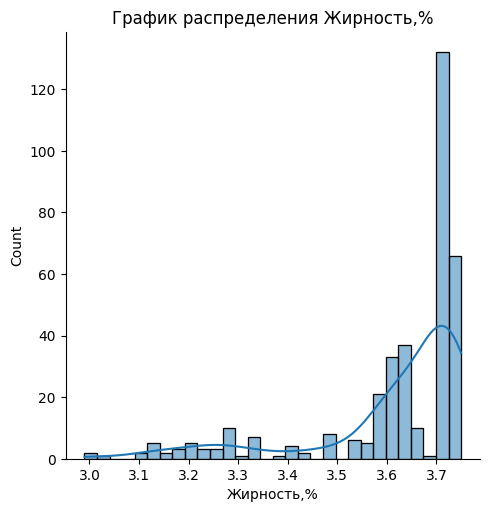

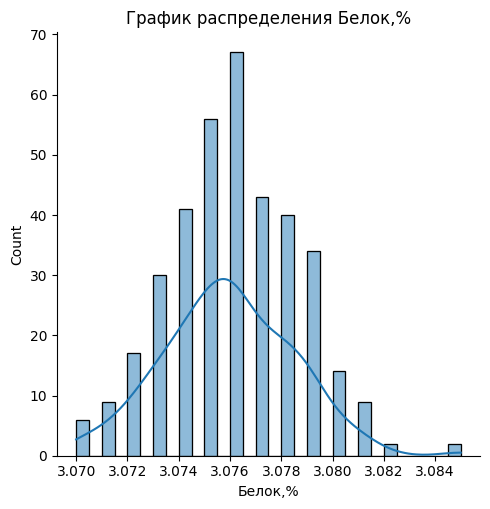

In [30]:
bar_god_milk_col(df_ferma_mine_god)

__Вывод:__ исследовали мадель только с вкусным молоком.  
Только белок имеет нормальное распределение.


___Таблица 2___
    

__3.3 Построение Boxplot для определения выбросов__

In [31]:
df_cow_buy_test = df_cow_buy.drop(['Порода','Тип_пастбища', 'Порода_папы_быка', 'Имя_папы', 'Возраст'], axis=1)
def hotmap():
    _, axes = plt.subplots(1, 2,figsize=(10,5))
    col = df_cow_buy_test.columns
    count=0
    for i in col:
        ax = sns.boxplot(df_cow_buy_test[i], ax = axes[count], );
        ax.set_title(i, fontsize=20)
        count +=1 

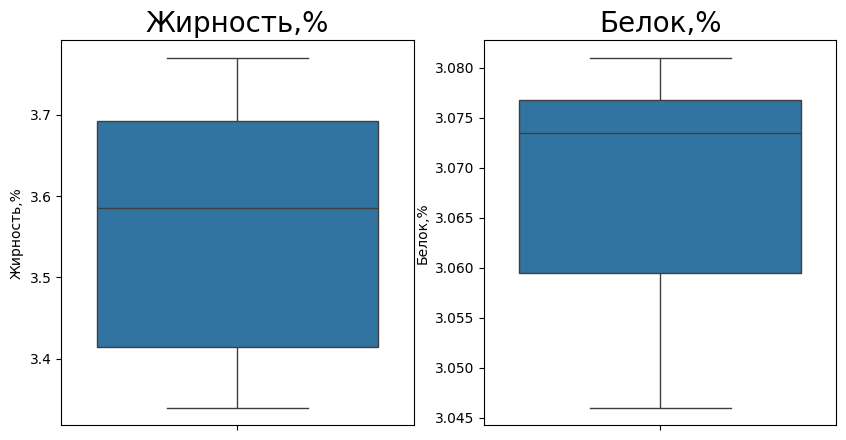

In [32]:
hotmap()

__Выворд:__ Выбросов нет, медианные значения для жирности 3,68, а для белка 3,0735.

Проведем графический анализ, за базовый признак примим ___Текущая жирность___

In [33]:
def bar(criterion):
    columns = ['Порода','Тип_пастбища', 'Порода_папы_быка', 'Имя_папы', 'Возраст']
    titles =['График зависимости жирности от породы','График зависимости жирности от типа пастбища','График зависимости жирности от породы папы быка','График зависимости жирности от имя папы','График зависимости жилность возраст']
    ncol = 2
    rows = len(columns)-ncol
    _, axs = plt.subplots(rows, ncol, figsize=(20,18)) 
    count=0
    count_2=0
    for i in range(len(columns)):
        if i<len(columns)-2:
            df_cow_buy.groupby(columns[i])[criterion].mean().plot(kind ='bar'
                                                                  ,title = titles[count],edgecolor='black'
                                                                  , rot=0, ax = axs[count, count_2]
                                                                  , ylabel='кол-во',xlabel=columns[i], grid=True, ylim=(2,5));
            #count+=1
            if count_2==1:
                count_2 -=1
                count+=1
            else:
                count_2+=1

        else:
            df_cow_buy.groupby(columns[i])[criterion].mean().plot(kind ='bar'
                                                                  ,title = titles[count],edgecolor='black'
                                                                  , rot=0, ax = axs[count, count_2]
                                                                  , ylabel='кол-во',xlabel=columns[i], grid=True, ylim=(2,4));
            #count+=1
            if count_2==1:
                count_2 -=1
                count+=1
            else:
                count_2+=1


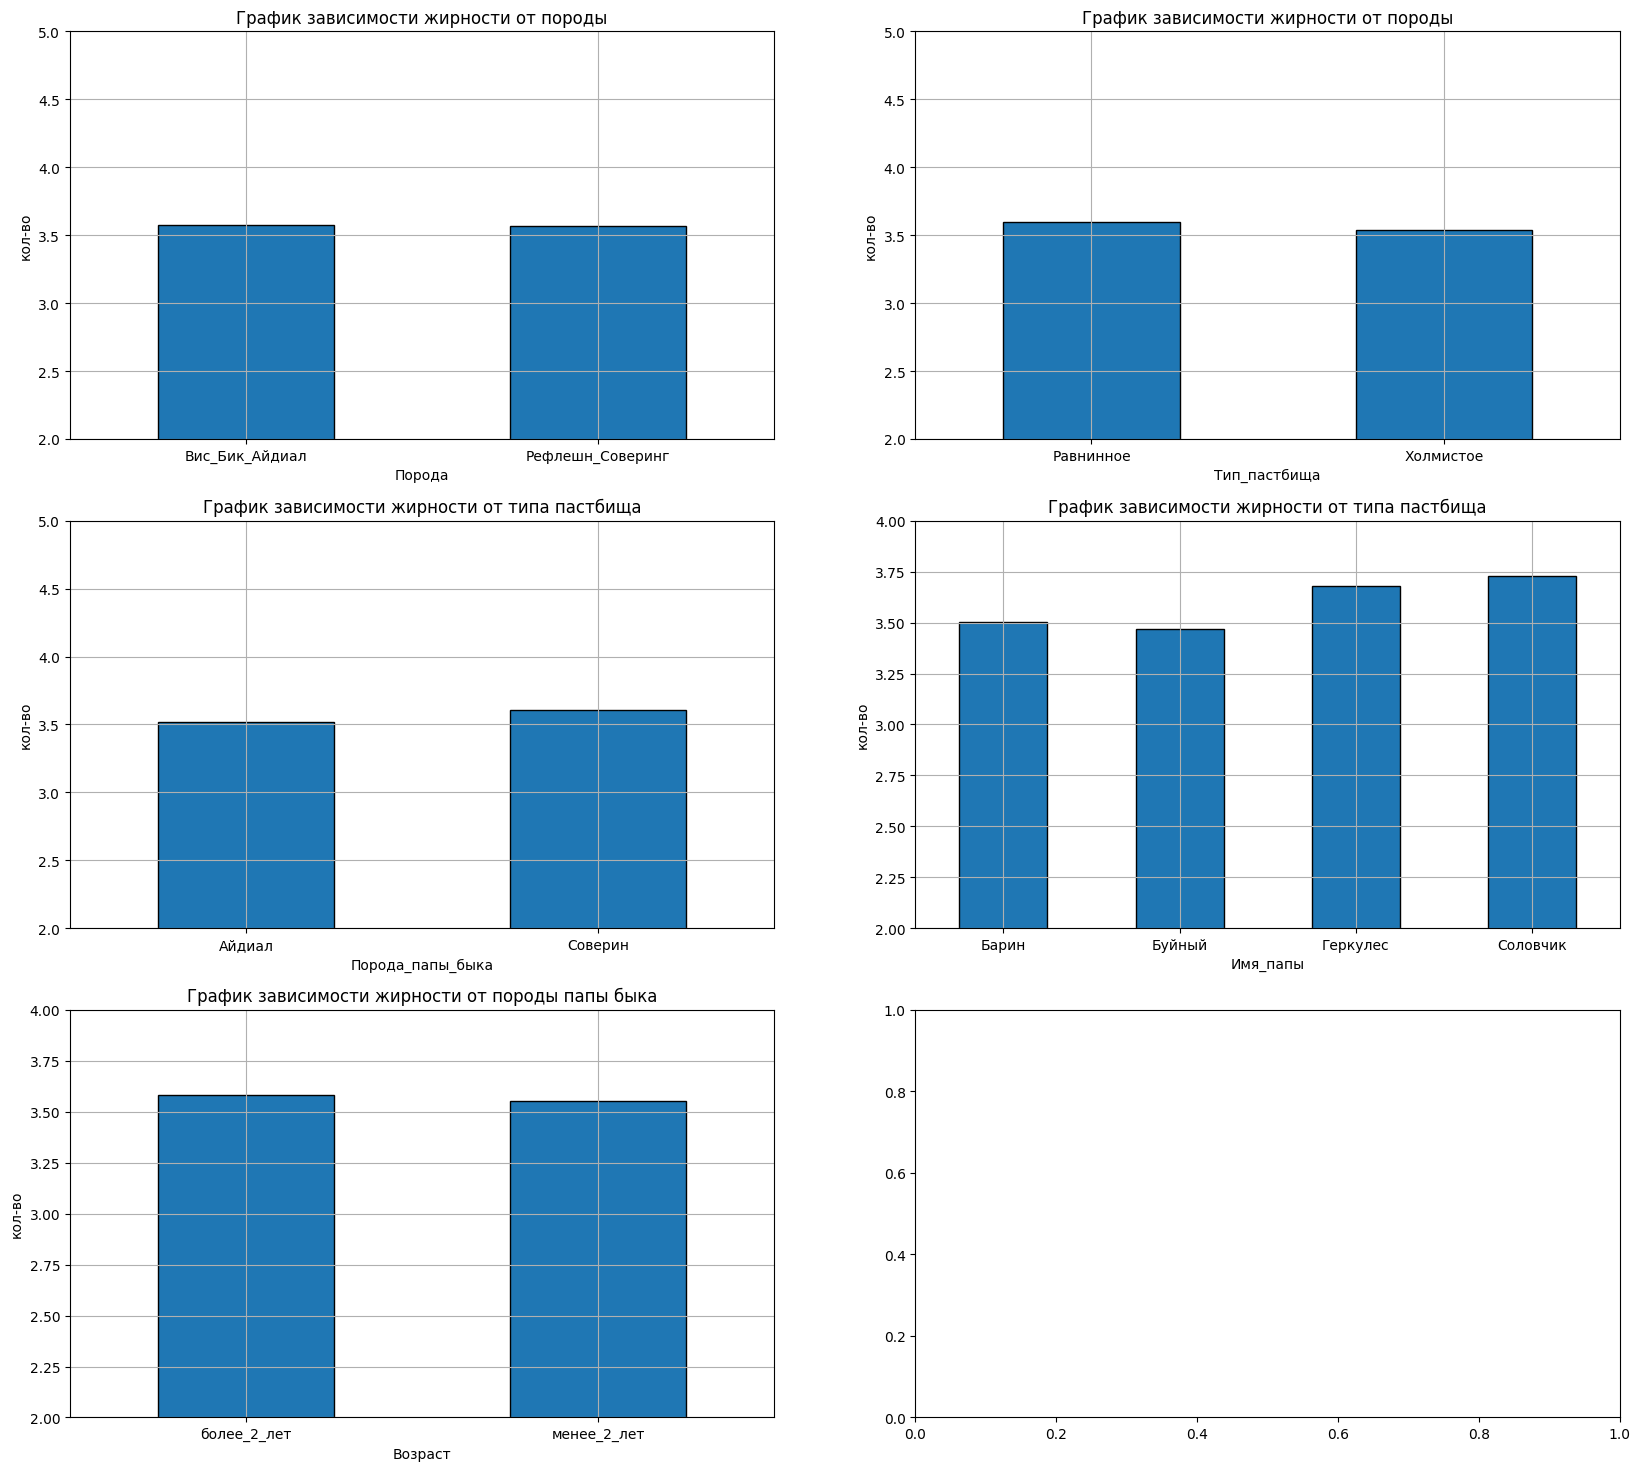

In [34]:
bar('Жирность,%')

__Вывод:__  
Данные удивительно усреднены пару графиков вызывают большие вопросы, но с определённой долей уверености можно сказать что коровы от Совчик дают более жирное молоко. Но так как данных очень мало верить можно с определённой долей скептецизма.

## Корреляционный анализ

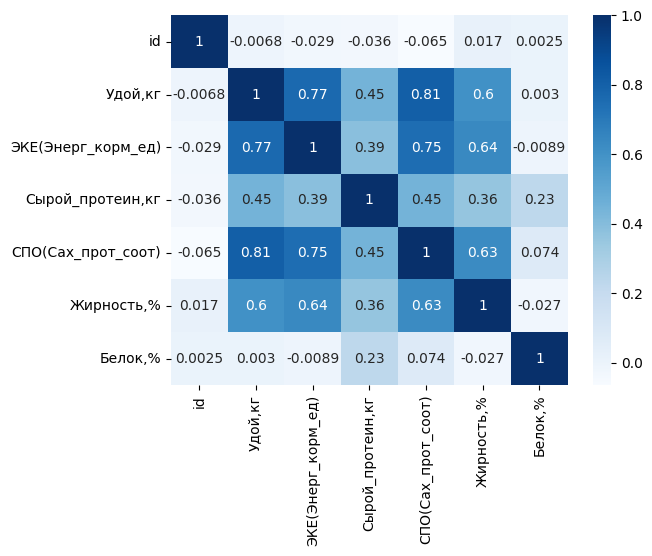

In [35]:
#plt.figure(figsize=(7,7))
sns.heatmap(df_ferma_mine_test.corr(), cmap="Blues", annot=True)
pass

__Вывод:__   
Из данных выше, мы можем сказать, что сильнее всего удой зависит от СПО вполне предсказуемо качество еды определяет результат, также колличество еды оказываеет влияние на удой. Связь жирность - удой также зависит от качесва еды в равной степени как от СПО так и ЭКЕ. 

Многие из этих параметров оказывают довольно слабое влияние, но если попробовать их объединить в одну группу, то, наверняка, можно будет построить хорошую предсказательную модел.  


___Исследуем Мультиколлинеарность___

Мультиколлинеарность - это явление, при котором два или более признака взаимно связаны друг с другом, что может вызвать проблемы при построении модели. Два основных типа проблем, связанных с мультиколлинеарностью:

Затруднение интерпретации коэффициентов: Когда мультиколлинеарность присутствует, сложно определить точный вклад каждого признака в предсказание, так как их эффекты смешиваются между собой;

Неустойчивость коэффициентов: Малейшие изменения в данных могут привести к значительным изменениям коэффициентов модели, что делает результаты менее надежными и устойчивыми;

Мультиколлинеарность может быть особенно проблематичной для наших моделей, линейная регрессия, логистическая регрессия так как они используют линейную комбинацию признаков.


In [36]:
c = ['id','ЭКЕ(Энерг_корм_ед)', 'Сырой_протеин,кг','СПО(Сах_прот_соот)', 'Жирность,%', 'Белок,%']
X = df_ferma_mine_test[c] # Выделяем "независимые" переменные (признаки)

X_with_const = sm.add_constant(X) # Добавляем константу для использования модуля statsmodels

model = sm.OLS(df_ferma_mine_test['Удой,кг'], X_with_const) # Создаем объект регрессии


result = model.fit()  # Обучяем модель

# Рассчитываем VIF для каждого признака
vif = pd.DataFrame()
vif['Feature'] = X_with_const.columns
vif['vif'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]



vif.round(2) # Выводим результаты

,Feature,vif
0,const,1566376.04
1,id,1.01
2,ЭКЕ(Энерг_корм_ед),2.57
3,"Сырой_протеин,кг",1.34
4,СПО(Сах_прот_соот),2.66
5,"Жирность,%",1.89
6,"Белок,%",1.08


___VIF (Variance Inflation Factor)___:  
    
VIF измеряет насколько дисперсия коэффициента увеличивается, когда предикторы коррелированы. Если VIF = 1, переменные не коррелированы. Если VIF > 5-10, то существует проблема мультиколлинеарности.
На основе новых значений VIF можно сделать следующие выводы:  
    
const (константа): Значение VIF для константы 1566376,04. Это значение можно игнорировать. Важно помнить, что высокое значение VIF для константы не связано с мультиколлинеарностью между признаками;

Остальные признаки: Все признаки имеют значения VIF в диапазоне от 1 до 2.66. Это подтверждает вывод о том, что между признаками нет сильной мультиколлинеарности. Самое высокое значение VIF (2.66) у признаков СПО(Сах_прот_соот) и чуть меньше ЭКЕ(Энерг_корм_ед), но даже эти значения находятся в приемлемом диапазоне.

__Вывод__: Нет признаков мультиколлинеарности между переменными.

### __Диаграммы рассеяния__

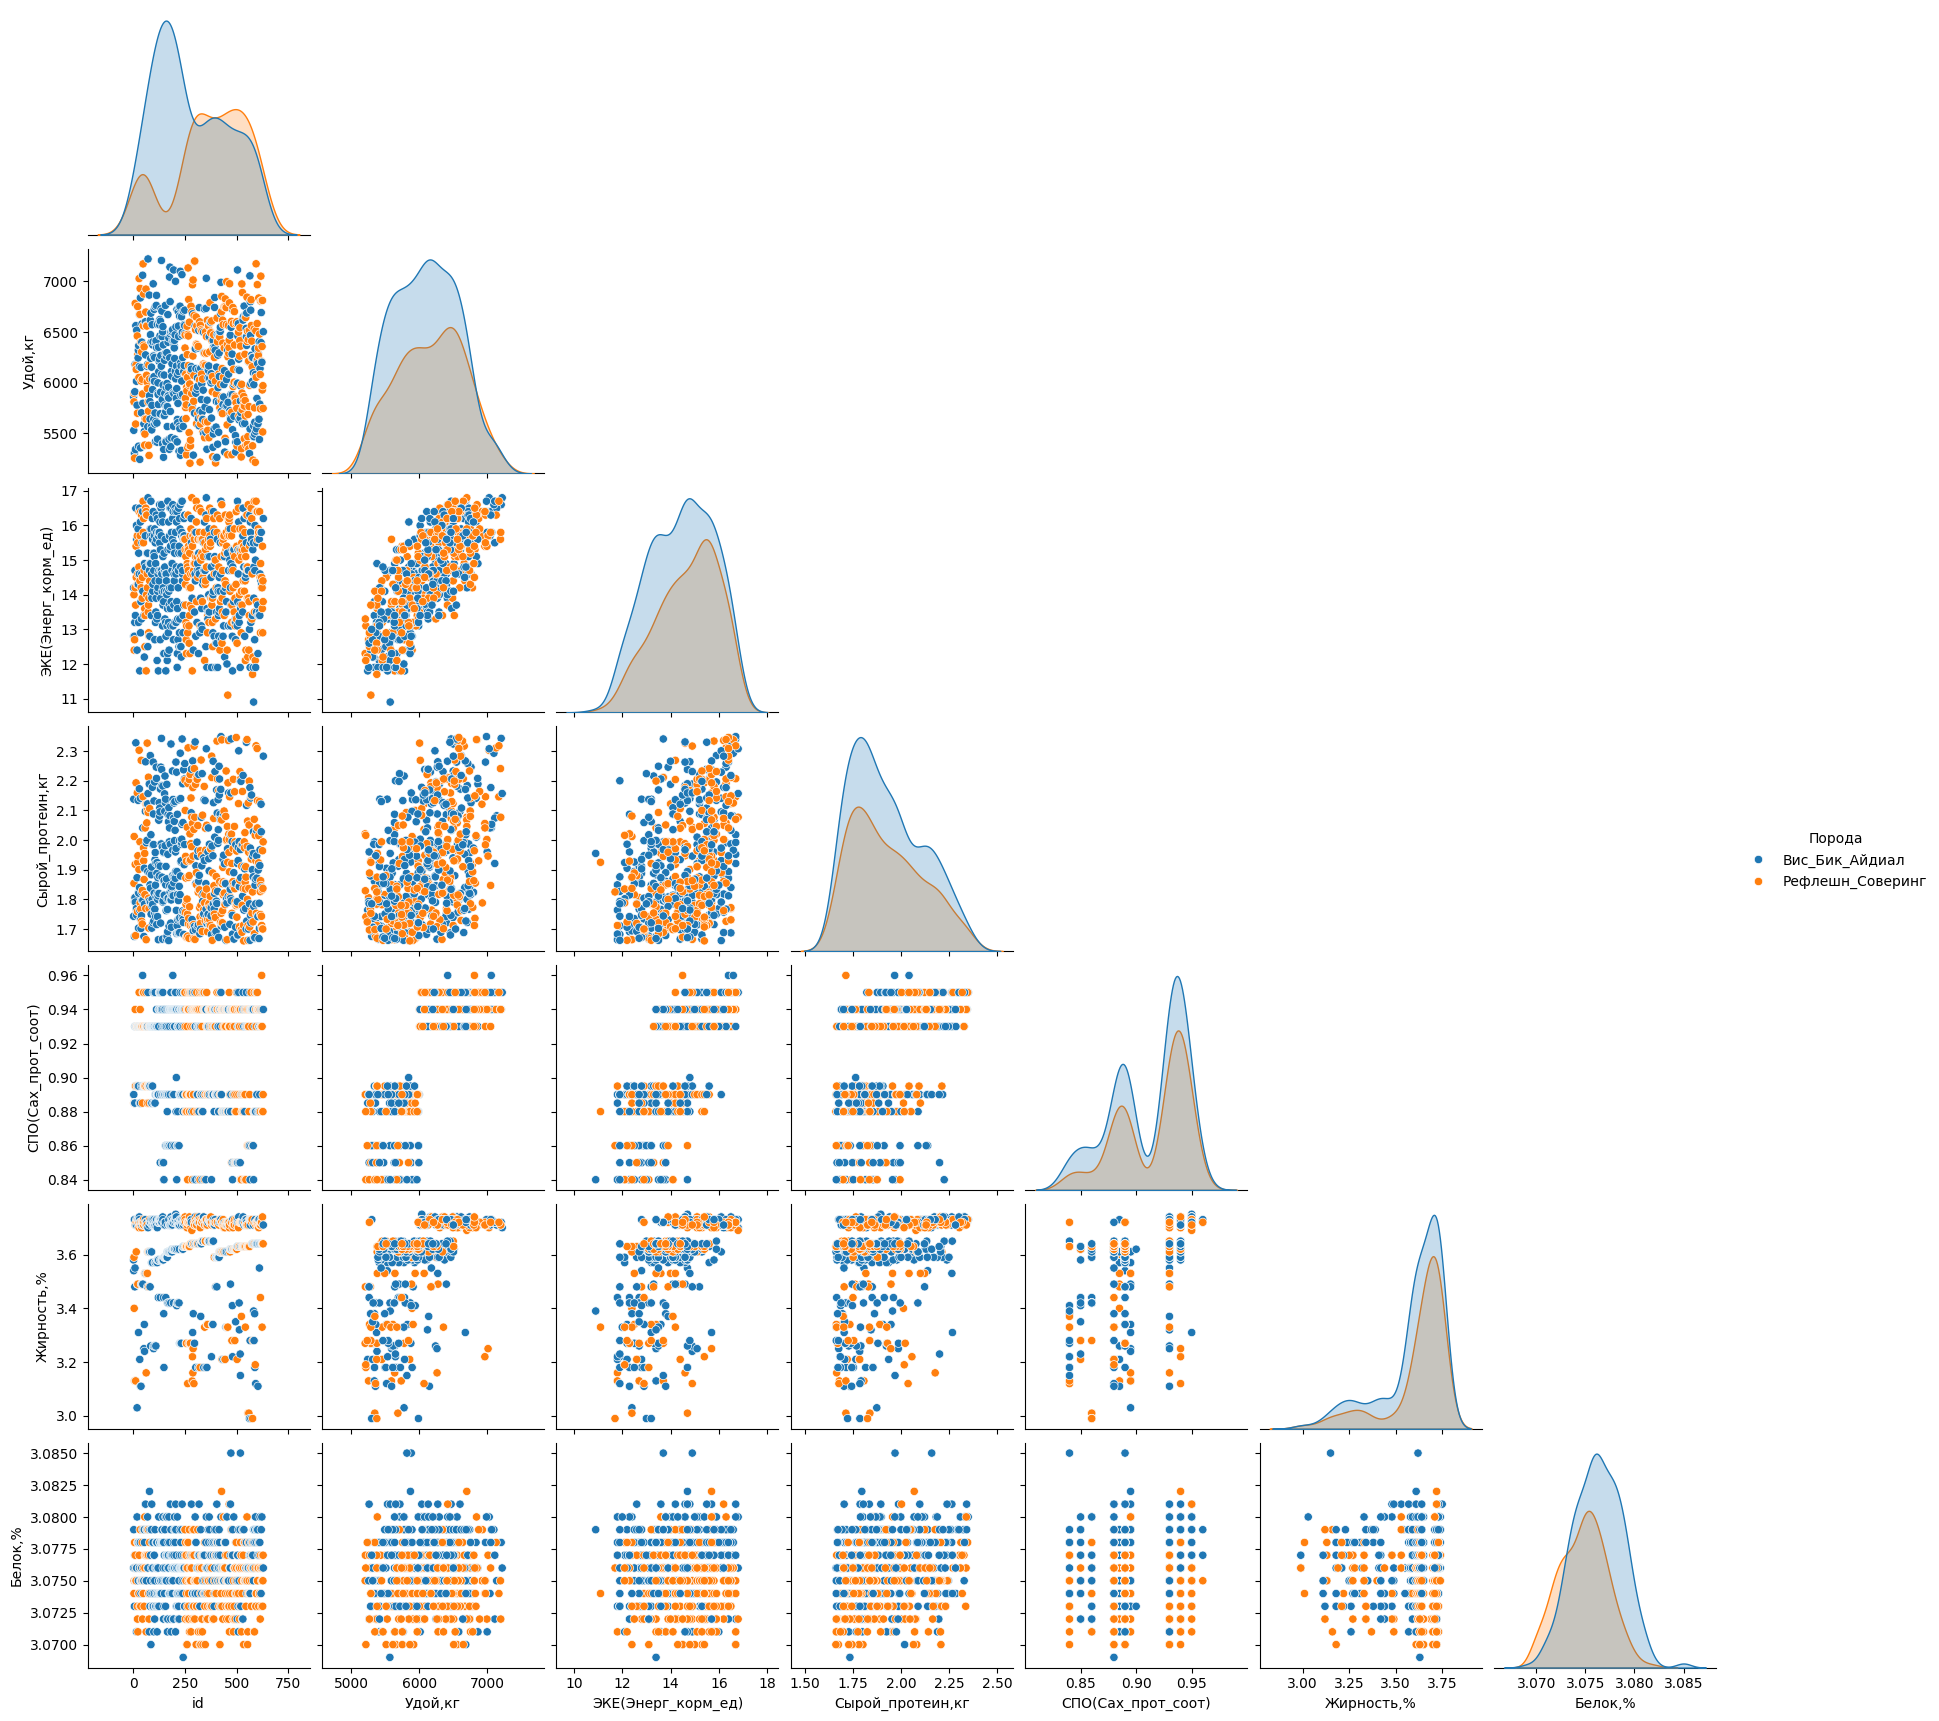

In [37]:
sns.pairplot(df_ferma_mine, hue='Порода', corner=True);

In [38]:
def scatter(df,target_feature,hue):
    columns=(['ЭКЕ(Энерг_корм_ед)', 'Сырой_протеин,кг', 'СПО(Сах_прот_соот)', 'Жирность,%', 'Белок,%'])
    
    ncol = 2
    rows = len(columns)-ncol
    fig, axs = plt.subplots(rows, ncol, figsize=(18,15))
    count=0
    count_2=0
    for i in range(len(columns)):
        sns.scatterplot(ax=axs[count, count_2], data=df, x=target_feature, y=columns[i] ,hue=hue, alpha=0.5).set(title='График распределения '+ columns[i])
        if count_2==1:
            count_2 -=1
            count+=1
        else:
             count_2+=1


__Диаграммы рассеяния Удой-Порода.__

In [39]:
#scatter(df_ferma_mine,'Удой,кг','Порода')

__Диаграммы рассеяния Удой-пастбища__

In [40]:
#scatter(df_ferma_mine,'Удой,кг','Тип_пастбища')

__Диаграммы рассеяния Удой-Возраст.__

In [41]:
#scatter(df_ferma_mine,'Удой,кг','Возраст')

__Диаграммы рассеяния Удой-Вкус молока.__

In [42]:
#scatter(df_ferma_mine,'Удой,кг','Вкус_молока')

Все диаграммы рпспределения и меют одинаковый вид для любых признаков. Они все довольно неплохо подвердают коллеляцию Пирсона проводимую выше.  
Выводы теже. За небольшим исключением это распределением зависимости удой-ЭКЕ линейная, сырой протеин оказывает умеренное воздействие на удой. Удой-СПО сильная связь. Жирность удой очень сильно напоминает гепербалу как вариант, и удой белок похож на линейную.
На диаграмме СПО-Удой рассеяния сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами и оно принемает значение в районе 0,92.  
С Жирностью так же имеет довольно явную границу в раоне 3,7.


## Обучение модели линейной регрессии

Поднатавливаем данные для обучения модели регрессии.  
1) Модель основанная на стандатрной базе __df_ferma_mine__.
2) Во второй модели модефицируем некоторые данные. Значение столбца __ЭКЕ(Энерг_корм_ед)__ возводим в квадрат и преобразуем СПО в бинарный признак.
3) Для третьей модели обкчения мы объеденяем две таблицы это __df_ferma_mine__ и __df_ferma_dad__. Зак счет этого объеденения мы получем новый признак __Имя Папы__.

In [43]:
df_ferma_mine_2 = df_ferma_mine.copy()


df_ferma_mine_3 = df_ferma_mine.merge(df_ferma_dad, on='id', how='right') # добавляем отца
df_ferma_mine_3 = df_ferma_mine_3[df_ferma_mine_3['Удой,кг']==df_ferma_mine_3['Удой,кг']]

In [44]:
#Добовляем новый сполбец с СПО с пребразованным в бинарный признак.
for i in range(len(df_ferma_mine_2)):
    if df_ferma_mine_2.loc[i,'СПО(Сах_прот_соот)'] > 0.92:
        df_ferma_mine_2.loc[i,'СПО_bin(Сах_прот_соот)'] = 1
    else:
        df_ferma_mine_2.loc[i,'СПО_bin(Сах_прот_соот)'] = 0    
                    

In [45]:
def asd(df, n=None): 
    
    """Делит, обучает, преобразует, масштабирует, кодирует, анализирует и выводит R2, MAE, RMSE, MSE и доверительный интервал  """
    
    X = df.drop(['Удой,кг'], axis=1) #делим датасет на выборки
    y = df['Удой,кг']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    
    quantitative_columns = X_train.select_dtypes(exclude='object').columns.to_list() # выделяем количественные столбцы для StandardScaler
    if n ==2:
        df_ferma_mine_2['ЭКЕ(Энерг_корм_ед)'] = df_ferma_mine_2['ЭКЕ(Энерг_корм_ед)'] ** 2 # возводим эке в квадарат
        quantitative_columns.remove('id')
        quantitative_columns.remove('Жирность,%')
        quantitative_columns.remove('Белок,%')
        quantitative_columns.remove('СПО(Сах_прот_соот)')
    else:
        quantitative_columns.remove('id')
        quantitative_columns.remove('Жирность,%')
        quantitative_columns.remove('Белок,%')
    
    
       
    ohe_categorical_columns = df.select_dtypes(include='object').columns.to_list() #категориальные признаки для OHE 
    
    X_train_two = X_train.copy()
    X_test_two = X_test.copy()
    
        
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train_two[ohe_categorical_columns]) # обучаем и преобразуем категориальные признаки из тренировочной выборки 
    X_test_ohe = encoder.transform(X_test_two[ohe_categorical_columns])
    encoder_col_names = encoder.get_feature_names()                          # получаем назавание колонок
          
        
    ## подготовка признаков (масштабирование и кодирование)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_two[quantitative_columns])
    X_test_scaled = scaler.transform(X_test_two[quantitative_columns])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=quantitative_columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=quantitative_columns)
    
    X_train_two = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test_two = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    
    # обучение модели и получение предсказаний на тестовых данных
    model_lr  = LinearRegression()
    model_lr.fit(X_train_two[quantitative_columns], y_train) # инициализация и обучение модели
    
    predictions = model_lr.predict(X_test_two[quantitative_columns]) # предсказанные для X_test_two
    
    # анализ остатков
    # рассчитываем остатки
    residuals = y_test - predictions
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions )
    rmse = mean_squared_error(y_test, predictions, squared=False)
    
    
    print(f"Прогноз {predictions[0]:.2f}, {y_test.head(1)}")
    print(f"R2 LinearRegression = {r2:.3f}")
    print(f"MAE LinearRegression = {mae:.0f}")
    print(f"RMSE Корень среднеквадратичной ошибки = {rmse:.3f}")
    print(f"MSE Среднеквадратичная ошибка = {rmse**2:.3f}")
    print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))
    
    # графики по количественным признакам — гистограмму частотности 
    # распределения и диаграмму рассеяния
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    
    axes[1].scatter(x=predictions, y=residuals )
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    


Прогноз 5763.05, 581    5980
Name: Удой,кг, dtype: int64
R2 LinearRegression = 0.711
MAE LinearRegression = 192
RMSE Корень среднеквадратичной ошибки = 242.374
MSE Среднеквадратичная ошибка = 58745.262
95% доверительный интервал = (6072.247727617289, 6195.643401561374)


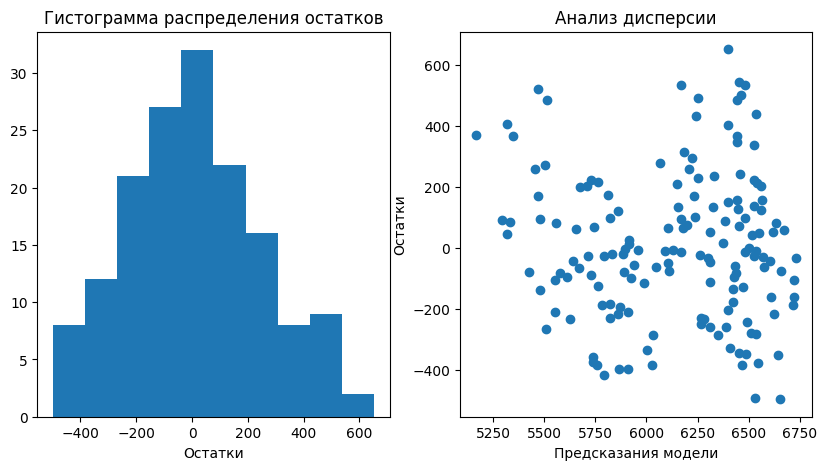

In [46]:
asd(df_ferma_mine) # полня таблица

Прогноз 5692.07, 581    5980
Name: Удой,кг, dtype: int64
R2 LinearRegression = 0.755
MAE LinearRegression = 180
RMSE Корень среднеквадратичной ошибки = 223.413
MSE Среднеквадратичная ошибка = 49913.205
95% доверительный интервал = (6072.65454504507, 6202.252007099214)


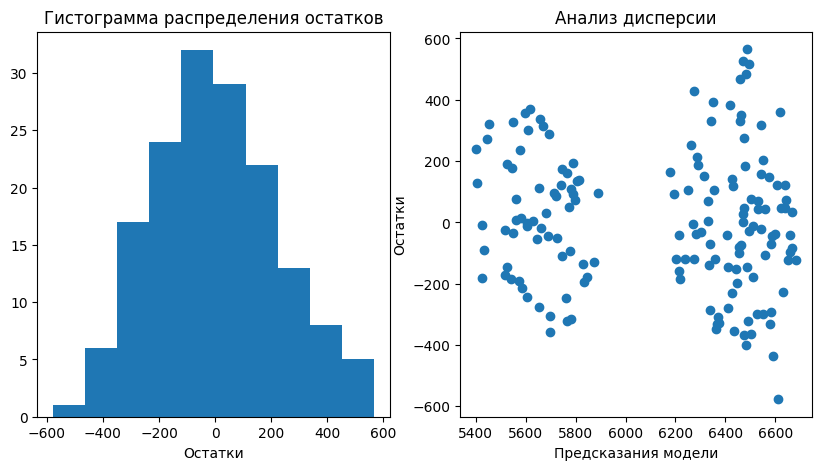

In [47]:
asd(df_ferma_mine_2, 2)

Прогноз 5763.05, 582    5980.0
Name: Удой,кг, dtype: float64
R2 LinearRegression = 0.711
MAE LinearRegression = 192
RMSE Корень среднеквадратичной ошибки = 242.374
MSE Среднеквадратичная ошибка = 58745.262
95% доверительный интервал = (6072.247727617289, 6195.643401561374)


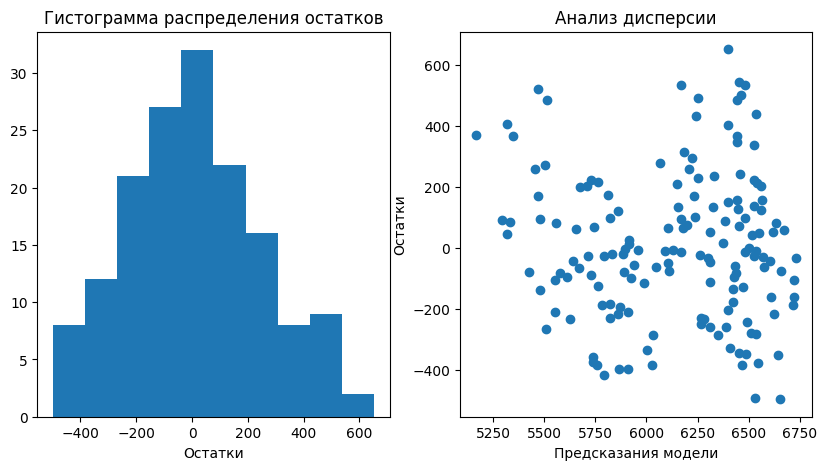

In [48]:
asd(df_ferma_mine_3)# пункт 3 (объедененная таблица с именем отца)

__Вывод:__  
Коэфициент детерминации R2 принемает максимальное значение 0.755 во второй моделе МО. Доверительный интервал 95% принемает значения от 6072.65 до 6202.25. Что нам впринципе подходит. Также во всех трёх категориях гистограма распределения остатков стримится к нормальному расперелению, что не плохо. А анализ дисперсии остатков очень хорошо вписывается в требование фермера удой больше 6000, показана четкое разделение.


__Добавляем требуемые или изменяем прметры__

In [49]:
df_cow_buy['ЭКЕ(Энерг_корм_ед)'] = df_ferma_mine['ЭКЕ(Энерг_корм_ед)'].mean()*1.05
df_cow_buy['Сырой_протеин,кг'] = df_ferma_mine['Сырой_протеин,кг'].mean()*1.05
df_cow_buy['СПО(Сах_прот_соот)'] = df_ferma_mine['СПО(Сах_прот_соот)'].mean()*1.05

__Прогноз удоя коров.__

In [50]:
X = df_ferma_mine.drop(['Удой,кг'], axis=1) #делим датасет на выборки
y = df_ferma_mine['Удой,кг']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
quantitative_columns = X_train.select_dtypes(exclude='object').columns.to_list() # выделяем количественные столбцы для StandardScaler
quantitative_columns.remove('id')
quantitative_columns.remove('Жирность,%')
quantitative_columns.remove('Белок,%')

#display(quantitative_columns)
     
ohe_categorical_columns = X_train.select_dtypes(include='object').columns.to_list() #категориальные признаки для OHE 
ohe_categorical_columns.remove('Вкус_молока')


#display(ohe_categorical_columns)

X_train_two = X_train.copy()
X_test_two = df_cow_buy.copy()
   

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

X_train_ohe = encoder.fit_transform(X_train_two[ohe_categorical_columns]) # обучаем и преобразуем категориальные признаки из тренировочной выборки 
X_test_ohe = encoder.transform(X_test_two[ohe_categorical_columns])
encoder_col_names = encoder.get_feature_names()                          # получаем назавание колонок
          
        
    ## подготовка признаков (масштабирование и кодирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_two[quantitative_columns])
X_test_scaled = scaler.transform(X_test_two[quantitative_columns])
    
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
X_train_scaled = pd.DataFrame(X_train_scaled, columns=quantitative_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quantitative_columns)
     
X_train_two = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_two = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
   
    # обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train_two[quantitative_columns], y_train) # инициализация и обучение модели


predictions = model_lr.predict(X_test_two[quantitative_columns]) # предсказанные для X_test_two
    


for i in range(len(df_cow_buy)):
    df_cow_buy['Удой,кг'] = round(predictions[i], 2)
    
#display(df_cow_buy)
print(f"Прогноз: {predictions[0]:.2f}")

Прогноз: 6574.79


__Вовод:__ Прогнозируемый удой коллеблится в районе 6575кг. год.

## Обучение модели логистической регрессии

In [51]:
df_ferma_mine['Вкус_молока_code'] = df_ferma_mine['Вкус_молока'].replace(['вкусно', 'не вкусно'],[1, 0]) # меняем на числовые значения

In [52]:
X = df_ferma_mine.drop(['Вкус_молока_code'], axis=1) #делим датасет на выборки
y = df_ferma_mine['Вкус_молока_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

quantitative_columns = X_train.select_dtypes(exclude='object').columns.to_list() # выделяем количественные столбцы для StandardScaler
quantitative_columns.remove('id')
quantitative_columns.remove('ЭКЕ(Энерг_корм_ед)')
quantitative_columns.remove('Сырой_протеин,кг')
quantitative_columns.remove('СПО(Сах_прот_соот)')
quantitative_columns

['Удой,кг', 'Жирность,%', 'Белок,%']

In [53]:
ohe_categorical_columns = X_train.select_dtypes(include='object').columns.to_list() #категориальные признаки для OHE 
ohe_categorical_columns.remove('Вкус_молока')
ohe_categorical_columns

['Порода', 'Тип_пастбища', 'Порода_папы_быка', 'Возраст']

In [54]:
X_train_two = X_train.copy()
X_test_two = X_test.copy()


In [55]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

X_train_ohe = encoder.fit_transform(X_train_two[ohe_categorical_columns]) # обучаем и преобразуем категориальные признаки из тренировочной выборки 
X_test_ohe = encoder.transform(X_test_two[ohe_categorical_columns])
encoder_col_names = encoder.get_feature_names()                          # получаем назавание колонок

        
## подготовка признаков (масштабирование и кодирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_two[quantitative_columns])
X_test_scaled = scaler.transform(X_test_two[quantitative_columns])
    
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
X_train_scaled = pd.DataFrame(X_train_scaled, columns=quantitative_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quantitative_columns)
     
X_train_two = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_two = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [56]:
clf = LogisticRegression()

clf = clf.fit(X_train_two, y_train) # обучаем

y_pred = clf.predict(X_test_two)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision =precision_score(y_test, y_pred)

print('accuracy:  ', round(acc, 3))
print('recall:    ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:   0.599
recall:     0.864
precision:  0.598


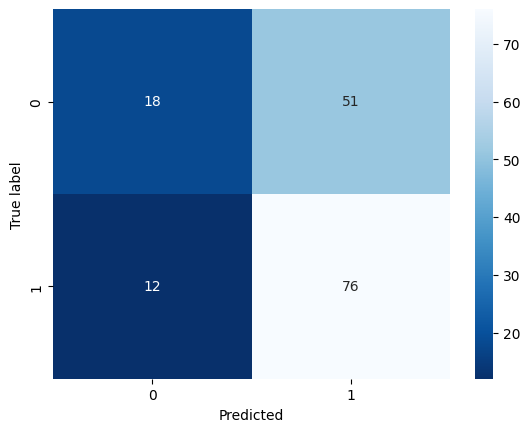

In [57]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Для нас критично значение ложно положительное __True-Positive__, так как покупаем только определённых коров с вкусным молоком, если вдруг среди отбраковыных коровок, с не вкусным молоком, окажется бурёнка с вкусным мы не сильно растроимся так как прямых убытков фермеру это не нанесёт.  

Так как выяснили что для фермера более важное значение __True-Positive__ то мы отдодим приаритет параметру __precision__.



На обученной мадели определяем порог precision которой будет максимально приближен к еденице.

In [58]:
import warnings
warnings.filterwarnings('ignore')

probabilities_one_valid = clf.predict_proba(X_test_two)[:,1]    
    
for i in np.arange(0.5, 0.9, 0.01).round(2):
    y_pred = probabilities_one_valid > i
    print('порог: ', i, 'precision: ', precision_score(y_test, y_pred))

порог:  0.5 precision:  0.5984251968503937
порог:  0.51 precision:  0.6016260162601627
порог:  0.52 precision:  0.5982905982905983
порог:  0.53 precision:  0.6017699115044248
порог:  0.54 precision:  0.6017699115044248
порог:  0.55 precision:  0.6090909090909091
порог:  0.56 precision:  0.6078431372549019
порог:  0.57 precision:  0.6039603960396039
порог:  0.58 precision:  0.5979381443298969
порог:  0.59 precision:  0.6021505376344086
порог:  0.6 precision:  0.5977011494252874
порог:  0.61 precision:  0.6265060240963856
порог:  0.62 precision:  0.6296296296296297
порог:  0.63 precision:  0.6301369863013698
порог:  0.64 precision:  0.6388888888888888
порог:  0.65 precision:  0.6774193548387096
порог:  0.66 precision:  0.7254901960784313
порог:  0.67 precision:  0.6956521739130435
порог:  0.68 precision:  0.7
порог:  0.69 precision:  0.7027027027027027
порог:  0.7 precision:  0.75
порог:  0.71 precision:  0.6818181818181818
порог:  0.72 precision:  0.6666666666666666
порог:  0.73 precisi

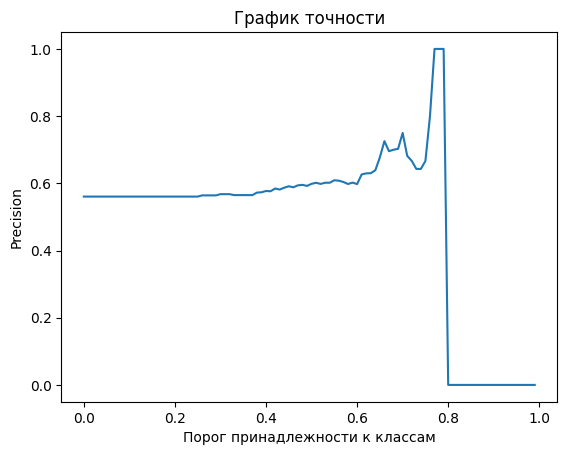

In [59]:
precision = []
for i in np.arange(0,1,0.01):
    y_pred = probabilities_one_valid > i
    precision.append(precision_score(y_test, y_pred))

plt.plot([i for i in np.arange(0,1,0.01)] ,precision)
plt.xlabel('Порог принадлежности к классам')
plt.ylabel('Precision')
plt.title('График точности')
plt.show()


В плане метрики у нас будут скачки, так как в какой-то момент с повышением порога из наших положительо предсказанных классов будут уходить правильные ответы, вероятность которых модель оценивала недостаточно высоко. Это у нас проиходит где-то на уровне 0.7 - снижение метрики. Затем модель при дальнейшем повышении порога отсеивает неправильный ответ, остаются только верные − мы достигаем единицы. А затем наш порог классов отсеивает и вообще все ответы, так как модель оценивала вероятность положительных классов не выше какого-то значения. В нашем случае 0.8.  

__Получение данных подходящих коров__  
На обученной модели получаем список подходящих коров.

In [60]:
X = df_ferma_mine.drop(['Вкус_молока_code', 'Вкус_молока_code'], axis=1) #делим датасет на выборки
y = df_ferma_mine['Вкус_молока_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

columns = ['ЭКЕ(Энерг_корм_ед)', 'Сырой_протеин,кг','СПО(Сах_прот_соот)', 'Порода', 'Тип_пастбища', 'Порода_папы_быка','Жирность,%', 'Белок,%']

X_train=X_train[columns] #обрезаем лишнее и сортируем столбцы правильно 
X_test = X_test[columns]

quantitative_columns = X_train.select_dtypes(exclude='object').columns.to_list() # выделяем количественные столбцы для StandardScaler
quantitative_columns.remove('Жирность,%')
quantitative_columns.remove('Белок,%')

   
ohe_categorical_columns = X_train.select_dtypes(include='object').columns.to_list() #категориальные признаки для OHE 


X_train_two = X_train.copy()
X_test_two = df_cow_buy.copy()
   

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

X_train_ohe = encoder.fit_transform(X_train_two[ohe_categorical_columns]) # обучаем и преобразуем категориальные признаки из тренировочной выборки 
X_test_ohe = encoder.transform(X_test_two[ohe_categorical_columns])
encoder_col_names = encoder.get_feature_names()                          # получаем назавание колонок
          
        
    ## подготовка признаков (масштабирование и кодирование)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_two[quantitative_columns])
X_test_scaled = scaler.transform(X_test_two[quantitative_columns])
    
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
X_train_scaled = pd.DataFrame(X_train_scaled, columns=quantitative_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quantitative_columns)
     
X_train_two = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_two = pd.concat([X_test_ohe, X_test_scaled], axis=1)
 

clf = LogisticRegression()

clf = clf.fit(X_train_two, y_train)



for i in range(len(df_cow_buy)):
    df_cow_buy['Подходят'] = clf.predict_proba(X_test_two)[:,1] > 0.75


## Итоговые выводы

__Список перспективных коров__  
В список попали 5 коров с наиболее перспективным сочитанием входящих пораметров.  Так при значении порога "точности" равной 1 мы получаем только три персективные коровыто для увелечения поголовия немного понизим порог до 0,75. Это позволило с малой долей риска отобрать большее колл-во коров. 

In [61]:
df_cow_buy[df_cow_buy['Подходят'] == True]


,Порода,Тип_пастбища,Порода_папы_быка,Имя_папы,"Жирность,%","Белок,%",Возраст,ЭКЕ(Энерг_корм_ед),"Сырой_протеин,кг",СПО(Сах_прот_соот),"Удой,кг",Подходят
0,Вис_Бик_Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2.019948,0.958744,6574.79,True
8,Вис_Бик_Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2.019948,0.958744,6574.79,True
10,Вис_Бик_Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2.019948,0.958744,6574.79,True
11,Вис_Бик_Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2.019948,0.958744,6574.79,True
13,Вис_Бик_Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2.019948,0.958744,6574.79,True


Так же я рекомендовал фермеру увеличить кормавую базу на 5% имеющемуся скоту, собрать данные о том как изменится состношение вскусного молока от не вскусного и как изменится Удой.  
Затем провести переобучение модели и тогда результат прогноза будит более точным.  

__Сделайте выводы о моделях линейной регрессии и логистической регрессии.__

__Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?__
1) Отбор значимых признаков. Удаление нерелевантных или коррелирующих признаков.  
2) Обработка и преобразование данных. Масштабирование, нормализация, обработка пропущенных значений и выбросов помогают улучшить качество модели.  
3) Кросс-валидация. Разделение данных на обучающую и тестовую выборки.


__Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?__  
Способы улучшения регриссеонной модели.  
1) Увеличение объема и разнообразия доступных данных (см. рекомендация ферму). Чем больше данных, тем более точные и устойчивые оценки параметров модели можно получить.  
2) Кросс-валидации для оценки и выбора модели, помогает избежать переобучения и повысить устойчивость модели.
3) Использование дополнительных признаков и/или генерация новых признаков из существующих.

__При анализе рисков или экономических расчетов важными метриками моделей классификации, включая логистическую регрессию, могут быть:__  
Которые проходили:  

1) ___Точность (accuracy)___: Доля правильно классифицированных наблюдений относительно общего количества наблюдений. Эта метрика важна, чтобы оценить, насколько хорошо модель делает предсказания в целом.  

2) ___Полнота (recall)___: Доля истинно положительных случаев, которые были правильно предсказаны моделью, относительно общего числа истинно положительных случаев. Эта метрика важна при оценке способности модели обнаруживать положительные случаи (риски) и минимизировать ложноотрицательные результаты.  

3) ___Точность (precision)___: Доля истинно положительных случаев, которые были правильно предсказаны моделью, относительно общего числа предсказанных положительных случаев. Эта метрика важна при оценке способности модели минимизировать ложноположительные результаты.  

Это которые еще не проходили:  

4) ___F1-мера (F1-score)___: Гармоническое среднее между полнотой и точностью. Эта метрика учитывает и полноту, и точность и может быть полезна для нахождения баланса между ними.  

5) ___ROC-кривая (Receiver Operating Characteristic curve)___: График, показывающий зависимость между долей истинно положительных результатов и долей ложноположительных результатов при изменении порога классификации. Эта метрика полезна при оценке чувствительности и специфичности модели и определении оптимального порога классификации.  

6) ___AUC-ROC (Area Under the ROC Curve)___: Площадь под ROC-кривой. Эта метрика дает общую оценку производительности модели, учитывая все возможные пороги классификации.  

В контексте анализа рисков или экономических расчетов, важно учитывать все эти метрики, чтобы оценить эффективность модели и принять взвешенные решения.